In [1]:
import os
import lmdb
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from preprocess.patchset import PatchSet

## put you dir here 
data_path = '/mnt/c/Users/11351/Desktop/patch_set_1150_224'
os.chdir(data_path)

ModuleNotFoundError: No module named 'preprocess'

In [2]:
train_roi = pd.read_csv(os.path.join(data_path,'csv/train_roi.csv'))
test_roi = pd.read_csv(os.path.join(data_path,'csv/test_roi.csv'))
full_data = pd.concat([train_roi,test_roi])

In [3]:
# full_images = train_roi['image file path'].copy().drop_duplicates().to_numpy()

In [4]:
train_set = PatchSet('../cbis-ddsm-png/',train_roi,'mdb/patch_images_112',out_csv='csv/patch_train_112.csv',
                    number_positive = 10,number_negative= 10,number_hard_bkg=10, patch_size=112
)

test_set = PatchSet('../cbis-ddsm-png/',test_roi,'mdb/patch_images_112',out_csv='csv/patch_test_112.csv',
                    number_positive = 10,number_negative= 10,number_hard_bkg=10, patch_size=112
)

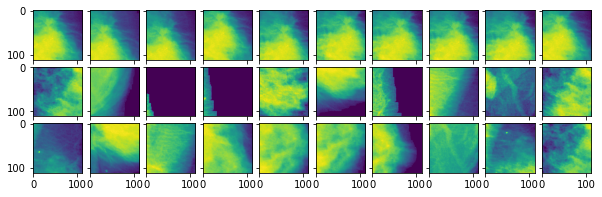

In [18]:
patches =  train_set.show_sample_from_generation(989)

for patch in patches:
    if patch.shape[0] * patch.shape[1] == 0:
        print('get empty')

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                nrows_ncols=(3, 10),  # creates 2x2 grid of axes
                axes_pad=0.1,  # pad between axes in inch.
                )

for ax, im in zip(grid, patches):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()